## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

## Extração Dataset

In [3]:
filepath = '../data/raw/ecommerce-dataset.xlsx'
df = pd.read_excel(filepath, sheet_name="E Comm")

In [ ]:
df.head()

## Divisão Treino e Teste

In [ ]:
x = df.loc[:, ~df.columns.isin(['Churn', 'CustomerID'])]
y = df[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Merge

In [ ]:
train = x_train.merge(y_train, left_index=True, right_index=True)
test = x_test.merge(y_test, left_index=True, right_index=True)

## Análise Exploratória (EDA) E Preparação dos Dados


In [ ]:
x_train.shape # VISUALIZAR QUANTAS LINHAS E COLUNAS

In [ ]:
y_train.shape # VISUALIZAR QUANTAS LINHAS E COLUNAS

In [ ]:
# VERIFICAR TIPO DOS DADOS
pd.DataFrame({'train': x_train.dtypes, 'test': x_test.dtypes})

In [ ]:
# calcula a proporção de dados nulos em relação a quantidade total dos dados
pd.DataFrame ({'train': round(100*(x_train.isnull().sum()/x_train.count()), 2),
              'test': round(100*(x_test.isnull().sum()/x_test.count()), 2)})

## Análise Individual das Features

### Churn

In [11]:
y_train.isnull().sum(), y_test.isnull().sum()

(Churn    0
 dtype: int64,
 Churn    0
 dtype: int64)

In [12]:
y_train.value_counts()

Churn
0        3272
1         669
Name: count, dtype: int64

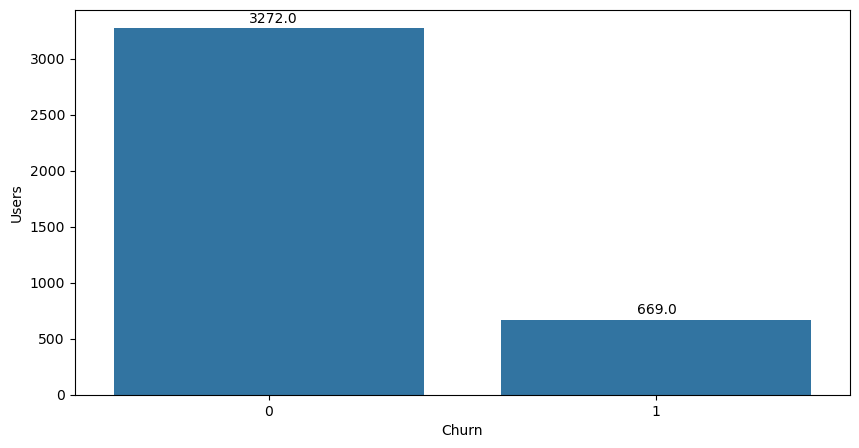

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=y_train, x='Churn')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50))
plt.ylabel('Users')
plt.show()